In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

def float_to_int(x): # function to convert float to integer (i.e.: 2014.0 to 2014)
    split_string = x.split(".") # splits input argument at decimal point, returns an array (i.e.: 2014.0 to [2014, 0])
    substring = split_string[0] # takes the value at the index 0 of new array (i.e.: 2014 of [2014, 0])
    if len(substring) > 0: # if the length of the substring is greater then 0 (which means, in the case that there is data in that cell) 
        return int(substring) # convert the substring to an integer, and return that integer
    else: # otherwise (in the case that there is no data in that cell)
        return '' # return an empty string


df = pd.read_csv('final.csv', converters={'calendar_year': float_to_int}) # read csv, and calls custom function as a converter on the calendar_year column

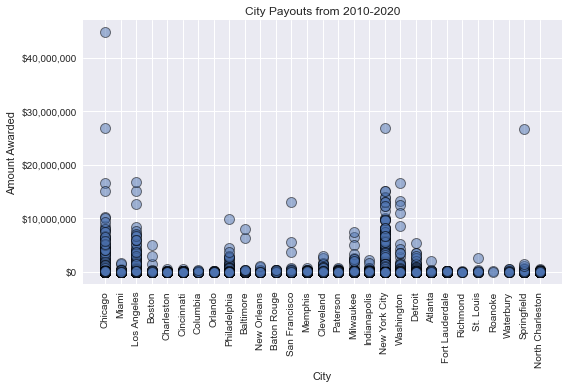

In [2]:
plt.style.use('seaborn') # to get seaborn style plot layout (carries on to all the other plots on this page)
fig, ax = plt.subplots() # plotting one subplot
plt.scatter(df.city, df.amount_awarded, s=100, alpha=0.5, edgecolor='black', linewidth=1) # customizing scatter plot to show the data that I want it to display

plt.title('City Payouts from 2010-2020') # setting the title of the plot
plt.xlabel('City') # setting the x axis label
plt.xticks(rotation=90) # rotating the x ticks 90 degrees so they display vertically
plt.ylabel('Amount Awarded') # setting the y axis label
ax.yaxis.set_major_formatter('${x:,.0f}') # formatting the text on the y axis to include the $ sign and commas


plt.tight_layout() # tighten the layout for appearance
plt.show() # display defined plot

Text(0.5, 1.0, 'Top 5 Highest Paying Cities From 2010 - 2020')

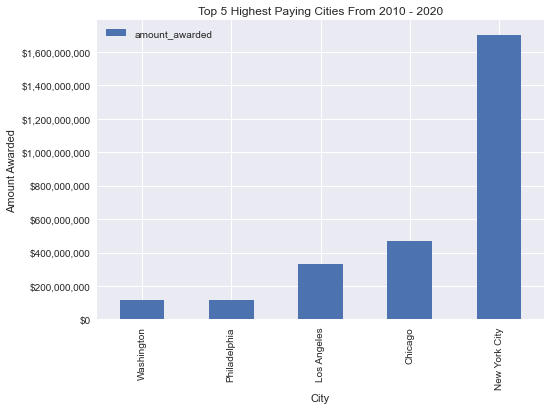

In [3]:
df2 = df.groupby(['city'], as_index=False)['amount_awarded'].sum().round() # grouped df by the sum of amount awarded for each city
df2.sort_values(by=['amount_awarded'], ascending=True, inplace=True) # sorted the sum of amount awarded from lowest to highest
df3 = df2.tail() # display only the top 5 highest amounts awarded
df4 = df3.plot(x="city", y=["amount_awarded"], kind="bar") # customizing bar plot to show the data that I want it to display
df4.yaxis.set_major_formatter('${x:,.0f}')  # formatting the text on the y axis to include the $ sign and commas
df4.set_xlabel('City') # setting the x axis label
df4.set_ylabel('Amount Awarded') # setting the y axis label
plt.title('Top 5 Highest Paying Cities From 2010 - 2020') # setting the title of the plot

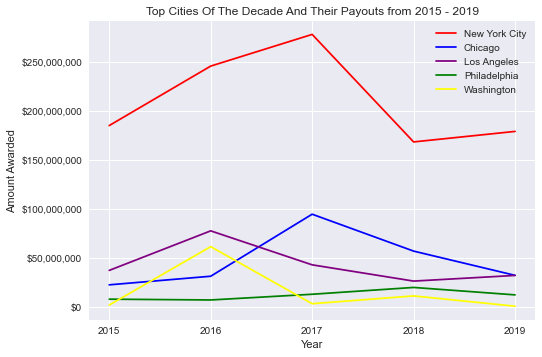

In [4]:
fig, ax = plt.subplots() # plotting one subplot

nyc_filter = df[df.city == "New York City"] # filters through the csv and pulls all the data with the string "New York City" in the city column
nyc_sum = nyc_filter.groupby(['calendar_year'], as_index=False)[['amount_awarded']].sum().round() # calculated the sum of the amount awarded for each calendar year and rounded it (used to get flat numbers)
nyc_5 = nyc_sum.drop([0, 1, 2, 3, 4]) # dropped data by index that was irrelevent to the objective of the plot (years outside of 2015 - 2019)
chicago_filter = df[df.city == "Chicago"] # filters through the csv and pulls all the data with the string "Chicago" in the city column
chicago_sum = chicago_filter.groupby(['calendar_year'], as_index=False)[['amount_awarded']].sum().round() # calculated the sum of the amount awarded for each calendar year and rounded it (used to get flat numbers)
chicago_5 = chicago_sum.drop([0, 1, 2, 3, 4]) # dropped data by index that was irrelevent to the objective of the plot (years outside of 2015 - 2019)
la_filter = df[df.city == "Los Angeles"] # filters through the csv and pulls all the data with the string "Los Angeles" in the city column
la_sum = la_filter.groupby(['calendar_year'], as_index=False)[['amount_awarded']].sum().round() # calculated the sum of the amount awarded for each calendar year and rounded it (used to get flat numbers)
la_5 = la_sum.drop([0, 1, 2, 3, 4, 10]) # dropped data by index that was irrelevent to the objective of the plot (years outside of 2015 - 2019)
philly_filter = df[df.city == "Philadelphia"] # filters through the csv and pulls all the data with the string "Philadelphia" in the city column
philly_sum = philly_filter.groupby(['calendar_year'], as_index=False)[['amount_awarded']].sum().round() # calculated the sum of the amount awarded for each calendar year and rounded it (used to get flat numbers)
philly_5 = philly_sum.drop([0, 1, 2, 3, 4, 5]) # dropped data by index that was irrelevent to the objective of the plot (years outside of 2015 - 2019)
washington_filter = df[df.city == "Washington"] # filters through the csv and pulls all the data with the string "Washington" in the city column
washington_sum = washington_filter.groupby(['calendar_year'], as_index=False)[['amount_awarded']].sum().round() # calculated the sum of the amount awarded for each calendar year and rounded it (used to get flat numbers)
washington_5 = washington_sum.drop([0, 1, 2, 3, 4, 5, 6]) # dropped information by index that was irrelevent to the objective of the plot (years outside of 2015 - 2019)

nyc_5.plot(kind='line',x = 'calendar_year',y = 'amount_awarded',ax=ax,color='red', label='New York City') # set data to display for the first line graph on the plot
chicago_5.plot(kind='line',x = 'calendar_year',y = 'amount_awarded',ax=ax,color='blue', label='Chicago') # set data to display for the second line graph on the plot
la_5.plot(kind='line',x = 'calendar_year',y = 'amount_awarded',ax=ax,color='purple', label='Los Angeles') # set data to display for the third line graph on the plot
philly_5.plot(kind='line',x = 'calendar_year',y = 'amount_awarded',ax=ax,color='green', label='Philadelphia') # set data to display for the fourth line graph on the plot
washington_5.plot(kind='line',x = 'calendar_year',y = 'amount_awarded',ax=ax,color='yellow', label='Washington') # set data to display for the fifth line graph on the plot
ax.set_xlabel('Year') # setting x axis label
ax.set_xticks([2015,2016,2017,2018,2019]) # setting ticks for the x axis
ax.set_ylabel('Amount Awarded') # setting the y axis label
plt.title('Top Cities Of The Decade And Their Payouts from 2015 - 2019') # setting the title of the plot
ax.yaxis.set_major_formatter('${x:,.0f}') # formatting the text on the y axis to include the $ sign and commas
plt.show() # display defined plot